## Premier League 20/21 Campaign Exploratory Data 

>Football is a game of mistakes, whoever makes the fewest, Wins!

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import squarify 
%matplotlib inline

## Load Dataset

 - Loading our dataset, using 'pd.read_csv' function from pandas to locate and read it. In Jupyter notebook, because this ipynb file has the same location with the csv, it can be automatically run.
 - Here i give aditional option  to display all the columns, by default, pandas only display several columns and not all of them.
 - Displaying the top 10 rows of dataset.

In [2]:
df = pd.read_csv('EPL_20_21.csv')
pd.set_option('display.max_columns', None)
df.head(10)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1
6,N'Golo Kanté,Chelsea,FRA,MF,29,30,24,2146,0,2,1504,86.6,0,0,0.04,0.05,7,0
7,Jorginho,Chelsea,ITA,MF,28,28,23,2010,7,1,1739,89.5,7,9,0.31,0.09,2,0
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0


## Dataset Profiling 

In [3]:
print("Dataset dimension :", df.ndim)
print("Dataset shape :", df.shape)
print("Dataset size :", df.size)

Dataset dimension : 2
Dataset shape : (532, 18)
Dataset size : 9576


 - Dataset is 2 dimensionals, comprises of 532 observations (rows) and 18 characteristics (columns). Multiplying the two numbers, we get a grand total of 9576 number of elements in our dataset.

In [4]:
types = df.dtypes.reset_index()
types.columns = ['Variable','Data Type']
types

,Variable,Data Type
0,Name,object
1,Club,object
2,Nationality,object
3,Position,object
4,Age,int64
5,Matches,int64
6,Starts,int64
7,Mins,int64
8,Goals,int64
9,Assists,int64


 - As we can see, understandably dataset is dominated by the numeric value, float and integer in 14 columns, while the rest of 4 columns are non numeric.
 - Non numeric variables include, Name, Nationality, Club and Position of the players, while the numeric values are the likes of Goal(s), Assist(s), or Passes Attempted by the players.

## Dataset Brief Explanation

 - Name, as it suggest, it specifies the name of players.
 - Club, specifies players current club in which they play for in the League.
 - Nationality, specifies player's current football national they play at International level.
 - Position, specifies role or responsibility at the team.
 - Age, specifies the age of players.
 - Matches, specifies player's total appereances or total fixtures they played during that campaign.
 - Starts, specifies player's amount of fixtures when they were selected to play and feature in the Starting Line up (Starting X!).
 - Mins, specifies player's total minutes played in the league during that campaign.
 - Goals, specifies player's tota
 l amount of golas they scored.
 - Assists, specifies player's total amount of assist / pass in which leads to goal.
 - Passes_Attempted, specifies player's total amount of passes  they attempted.
 - Perc_Passes_Completed, specifies player's total amount of success passes, a pass where it did not get intercepted by the opposition player, in percentage.
 - Penalty_Goals, specifies player's total amount of penalty which lead to goals.
 - Penalty_Attempted, specifies player's total amount of penalty the attempted.
 - XG, or Expected Goals, specifies the likelihood of a player to score a goal per 90 minutes basis (per one fixture), the higher the value means a player is very clinical in front of goal.
 - XA, or Expected Assist, similar to XG, specifies the likelihood of a player to create an assist pass per 90 minutes basis, the higher the value means a player is very creative in making passes which lead to a goal.
 - Yellow_cards, specifies player's total yellow cards tey got during the campaign.
 - Red_cards, specifies player's total red cards they got during the campaign.

## Checking for Missing and Blank Value

In [5]:
missing_data = df.isna().sum(axis=0).reset_index()
missing_data.columns = ['Variable','Missing Value']
blank_data = df.apply(lambda x : x == ' ').sum(axis=0).reset_index()
blank_data.columns = ['Variable','Blank Value']
merged_data = pd.merge(missing_data, blank_data, on=["Variable"])
merged_data['Filling Factor %'] = (df.shape[0]-merged_data['Missing Value'] + df.shape[0]-merged_data['Blank Value'] )/df.shape[0]*50
merged_data

,Variable,Missing Value,Blank Value,Filling Factor %
0,Name,0,0,100.0
1,Club,0,0,100.0
2,Nationality,0,0,100.0
3,Position,0,0,100.0
4,Age,0,0,100.0
5,Matches,0,0,100.0
6,Starts,0,0,100.0
7,Mins,0,0,100.0
8,Goals,0,0,100.0
9,Assists,0,0,100.0


 - There are zero missing values and blank values in dataset. Dataset is good and clean, no need to perform Data Cleaning.
 - Proceed to Data Exploration

## Data Exploration 

 - Before we are deep dive in to the data, firstly we want to create new feature (columns) in which it will count the average amount of minutes each player played for their given fixture appereances. <br>

### Creating Mins/Match Feature

In [6]:
df['Mins/Match'] = df['Mins']/df['Matches']
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins/Match
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80.277778
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88.548387
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74.342857
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84.666667
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74.156250


 - Succesfully created the new feature of Mins/Match.
 - As we can see from dataset preview above, there are players who can play a different role in the team, for example Mason Mount of Chelsea can play as both  Forward or as a Midfielder. To simplify our analysis, we might want to drop the secondary position for each player leaving their primary (preferred) position to play as.

In [7]:
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

 - Similar to implied above, there are indeed several players which are capable to play as two different positions. Whats interesting is that some who primarily play as a Defender can also play as a Forward. This is a very unique and an interesting finding. Right, before we drop the secondary position, I want to locate the player(s) which capable in positions said above.

### Locating Players Who Can Play Both as Forward and Defense

In [8]:
filt = (df['Position'] == 'DF,FW')
df.loc[filt,['Name','Club','Nationality',]]

,Name,Club,Nationality
119,Marc Albrighton,Leicester City,ENG
149,Arthur Masuaku,West Ham United,COD
152,Ryan Fredericks,West Ham United,ENG
255,Niels Nkounkou,Everton,FRA
463,Joe Bryan,Fulham,ENG
530,Antwoine Hackford,Sheffield United,ENG


 - Interestingly all of these players are Defender who are positioned on the flank of the pitch, we called such Defender a Fullback. In these modern games of Football, Fullback usually advances high up the pitch to help the forward preserving the team's width and overloading the opposition defender, increasing the likelihood for the forward to score a goal. So yeah, It is no surprise at all that these players can play as a Forward as well, albeit it is a Wide Forward (Winger), instead of a Striker.
 - Next is dropping player's secondary position.

In [9]:
# Splitting The Posiiton Value
position = pd.DataFrame(df['Position'].str.split(',',1).tolist(),
                                 columns = ['Position','Secondary_Pos'])
position = position.drop(columns='Secondary_Pos')

# Dropping Columns of Posiiton from Dataset
df = df.drop(columns='Position')

# Concatting the newly position dataframe with the df Dataset
df = pd.concat([df,position], axis='columns')
df.head()

,Name,Club,Nationality,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins/Match,Position
0,Mason Mount,Chelsea,ENG,21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80.277778,MF
1,Edouard Mendy,Chelsea,SEN,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88.548387,GK
2,Timo Werner,Chelsea,GER,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74.342857,FW
3,Ben Chilwell,Chelsea,ENG,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84.666667,DF
4,Reece James,Chelsea,ENG,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74.156250,DF


 - Succesfully dropped players secondary position.

 ### Total Number of Players Per Position

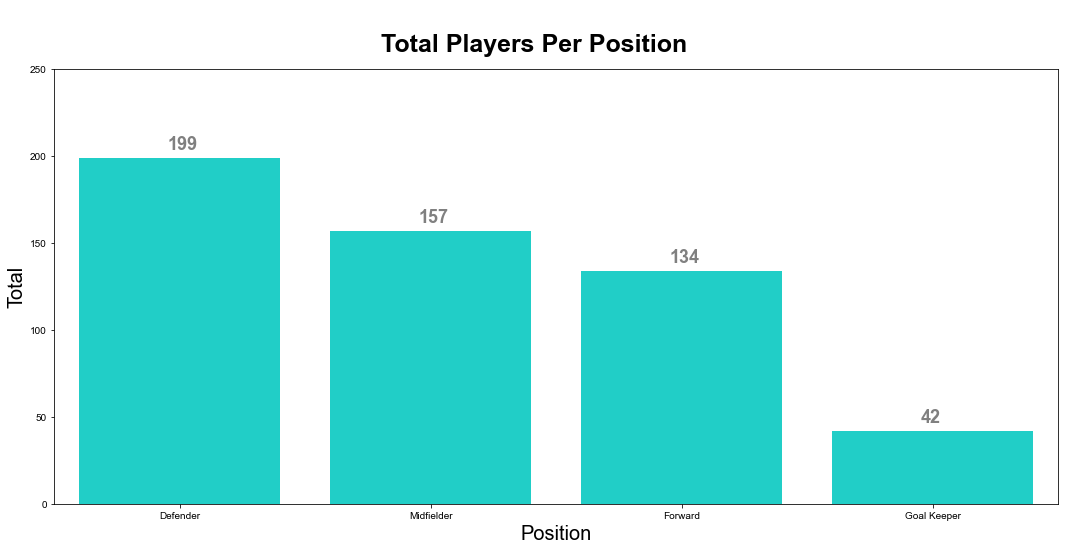

In [10]:
df_gk = (df['Position'] == 'GK').sum()
df_df = (df['Position'] == 'DF').sum() 
df_mf = (df['Position'] == 'MF').sum() 
df_fw = (df['Position'] == 'FW').sum()

df_pos = pd.DataFrame({'Position' : ['Forward','Midfielder','Defender','Goal Keeper'],
                           'Total' : [df_fw,df_mf,df_df,df_gk]})
df_pos = df_pos.sort_values(by='Total',ascending=False)

fig, g1 = plt.subplots(figsize=(18,8))
ax1 = sns.barplot(x='Position', y='Total', data=df_pos, color='#04ebe1')
sns.set_style('whitegrid')

title1 = '''
Total Players Per Position
'''
g1.text(0.8,245,title1,horizontalalignment='left',color='black',fontsize=25,fontweight='bold')

x1 = np.arange(len(df_pos['Position']))
y1 = df_pos['Total']
for i, v in enumerate(y1):
    g1.text(x1[i]-0.05, v+5, str(v), fontsize = 18, color='gray', fontweight='bold')


ax1.set_xlabel("Position", fontsize = 20, fontweight='normal')
ax1.set_ylabel("Total", fontsize = 20, fontweight='normal')
ax1.set_ylim(0,250)
plt.show()

 - Defender having the most number of players followed by midfielder, Forward and then Goalkeeper which is the least of the four positions.

### Plot of Players Nationality 

<AxesSubplot:>

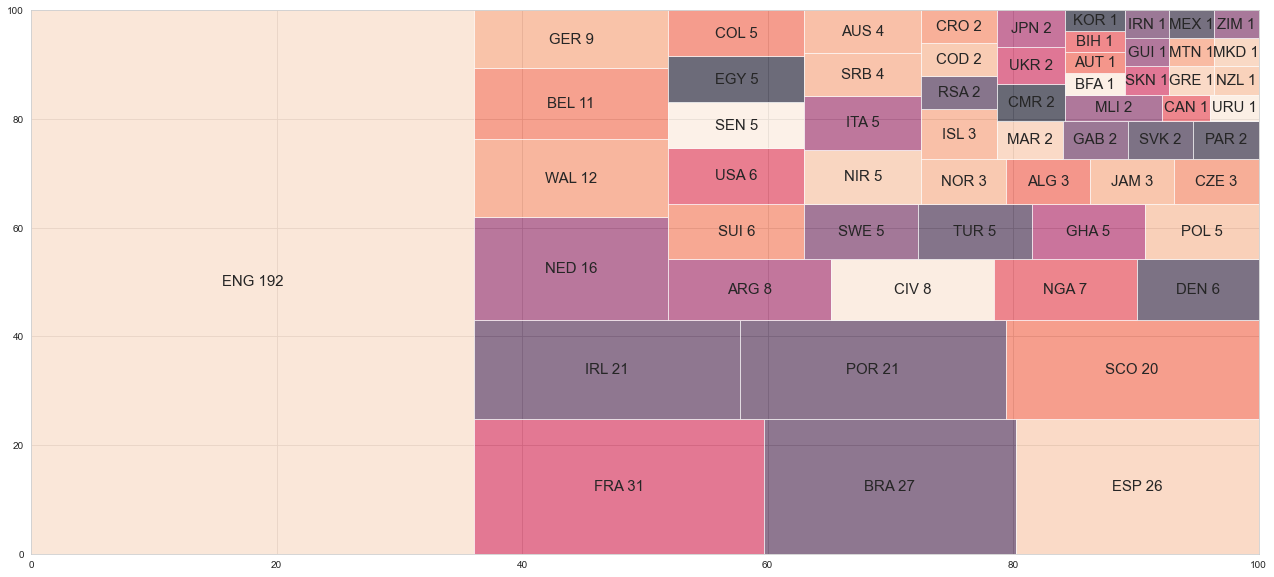

In [11]:
size = df.groupby('Nationality',)['Name'].count().sort_values(ascending= False).tolist() 
label=df.groupby('Nationality',)['Name'].count().sort_values(ascending= False).index.values.tolist()
plt.figure(figsize=(22,10))
label = [i+" "+j for i, j in zip(label, [str(x) for x in size])]
squarify.plot(sizes=size, label=label, alpha=.6, text_kwargs={'fontsize':15})

 - England has the most players out of any nations, not surprising to the very least, it is their local league after all. Followed by their European compatriots, like France, Spain, Portugal and Scotland having the most players after England. Whats interesting is, Brazil, a non European nation is also in the mix of having the most players in the league.

### Plot of Players Age

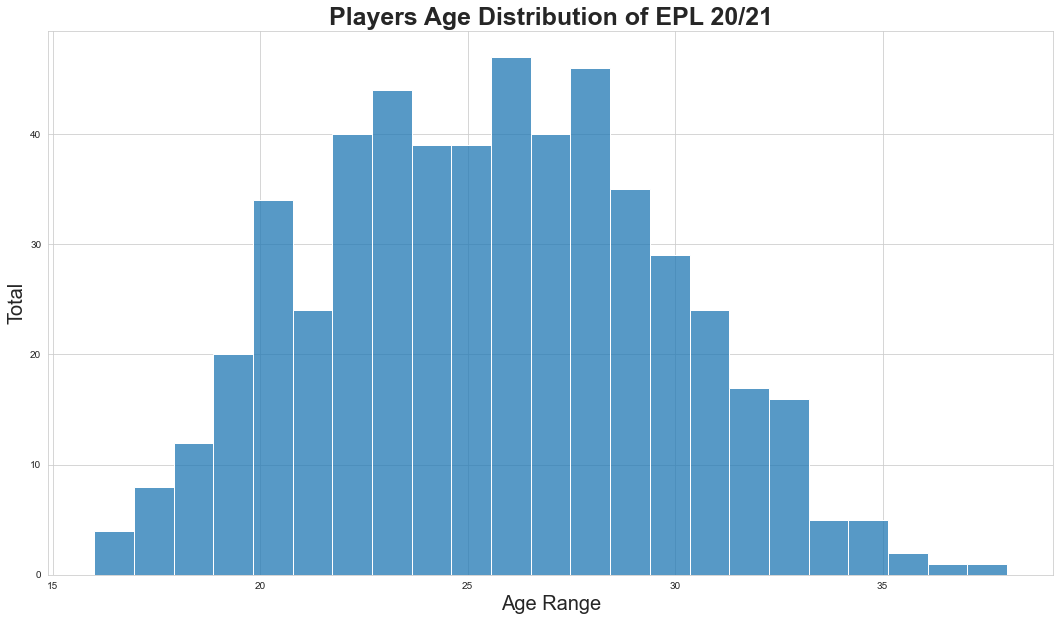

In [12]:
plt.figure(figsize=(18,10))
ax2 = sns.histplot(x=df["Age"], bins=23)
sns.set_style('whitegrid')
plt.xlabel('Age Range', fontsize=20, fontweight='normal')
plt.ylabel('Total', fontsize=20, fontweight='normal')
plt.title('Players Age Distribution of EPL 20/21',fontsize = 25, fontweight='bold')
plt.show()

 - The League is dominated by players in the range of 23 to 30 years old, this is good because majority of players hit their peak and playing to their best of abilities at age 27 to 29 years old, making the league more competitive and entertaining to watch. Can be inferred also that several managers are not overlooking young talents in the squad and not reluctant to give them the chance to feature in a match / fixture.

### Plot of Players Age For Each Club

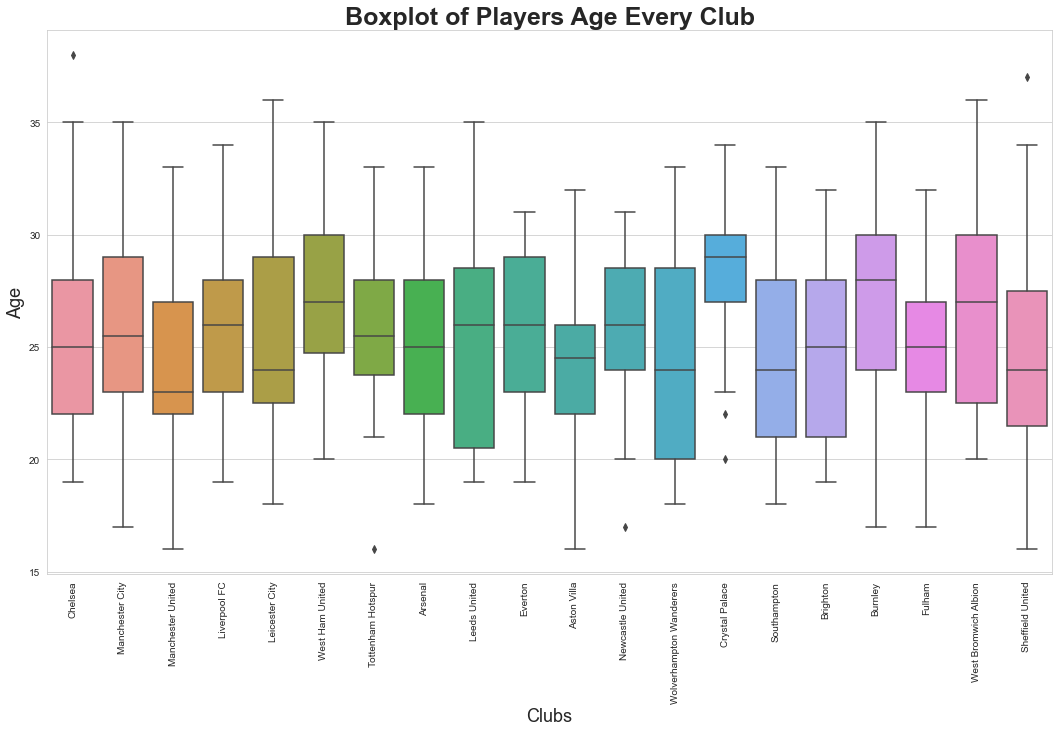

In [13]:
plt.figure(figsize=(18,10))
ax3 = sns.boxplot(x='Club', y='Age', data=df, orient='v')
sns.set_style('whitegrid')
plt.title("Boxplot of Players Age Every Club", fontsize = 25, fontweight='bold')
plt.xlabel("Clubs", fontsize=18, fontweight='normal')
plt.ylabel("Age",fontsize=18, fontweight='normal')
plt.xticks(rotation=90)
plt.show()

 - Manchester United having the luxury of the youngest squad in the league, they certainly have a bright future stars ahead of them. Followed by Leicester City, Aston Villa and Wolverhampton Wanderers. In contrast, Crystal Palace, having the oldest age squad, have not rejuvenate their squad.

### Total Goals Scored by Each Position

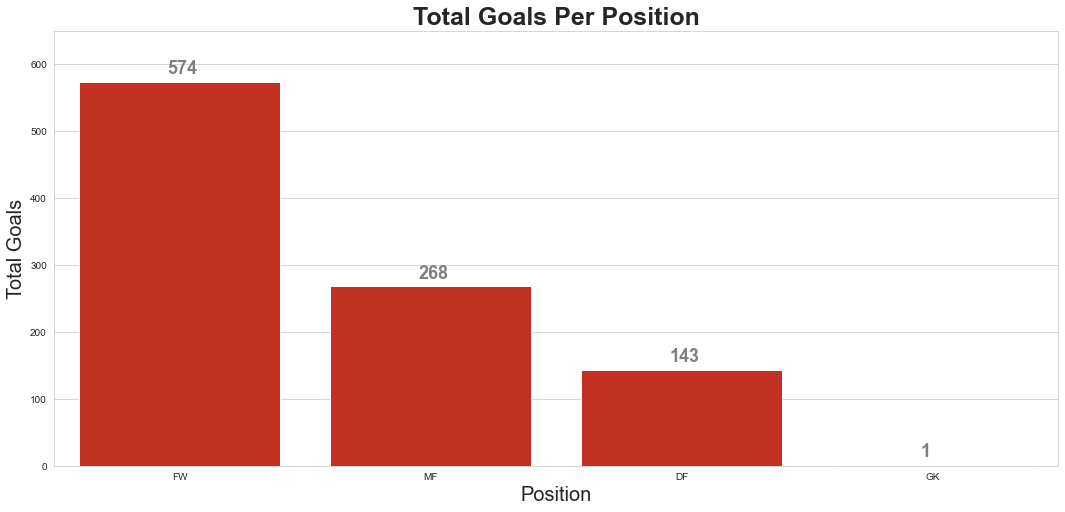

In [14]:
goal_pos = pd.DataFrame(df.groupby('Position',as_index=False)['Goals'].sum())
goal_pos = goal_pos.sort_values(by='Goals', ascending=False)

fig, g4 = plt.subplots(figsize=(18,8))
ax4 = sns.barplot(x='Position', y='Goals', data=goal_pos, color='#dd1b07')
sns.set_style('whitegrid')

x4 = np.arange(len(goal_pos['Position']))
y4 = goal_pos['Goals']
for i, v in enumerate(y4):
    g4.text(x4[i]-0.05, v+12, str(v), fontsize = 18, color='gray', fontweight='bold')

plt.title('Total Goals Per Position', fontsize=25, fontweight='bold')
plt.xlabel("Position", fontsize = 20, fontweight='normal')
plt.ylabel("Total Goals", fontsize = 20, fontweight='normal')
plt.ylim(0,650)
plt.show()

 - Seems the Forwards doing their role very well by scoring goals the most of out the 4 positions. As to be expected and it should be. Whats stood out for me though, there is a goal scored by a Goalkeeper, i think this is either an injury time late goal or simply an own goal conceded by the said goalkeeper.

### Total Goals Scored by Each Club

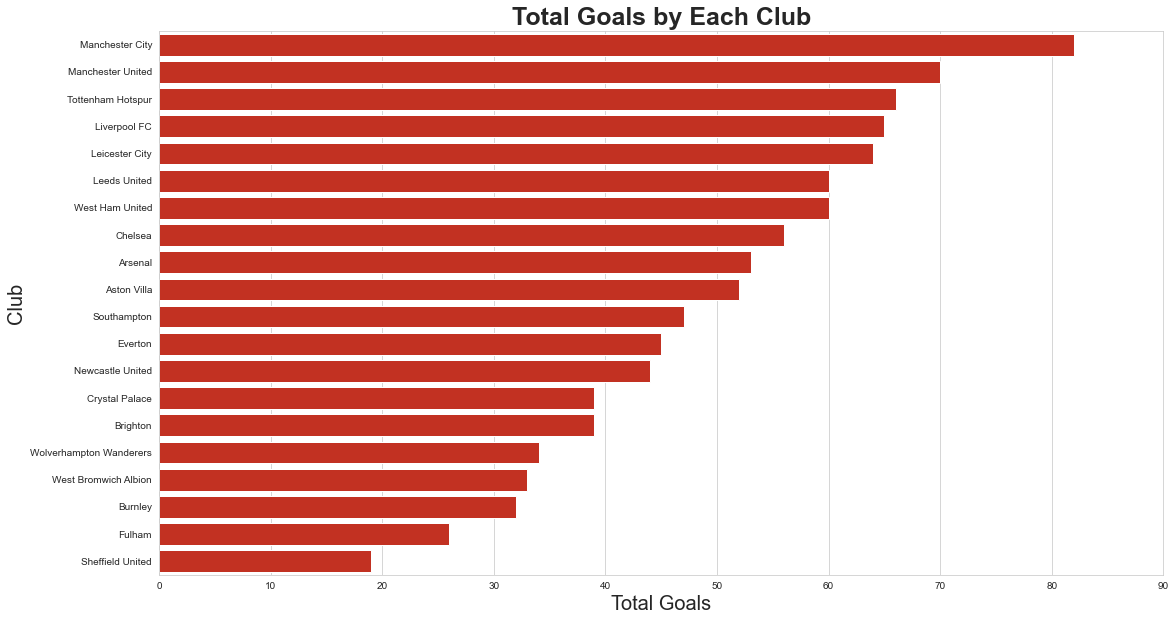

In [15]:
goal_club = pd.DataFrame(df.groupby('Club', as_index=False)['Goals'].sum())
goal_club = goal_club.sort_values(by='Goals', ascending=False)

fig, g5 = plt.subplots(figsize=(18,10))
ax5 = sns.barplot(y='Club', x='Goals', data=goal_club, color='#dd1b07')
sns.set_style('whitegrid')

plt.title('Total Goals by Each Club', fontsize=25, fontweight='bold')
plt.ylabel("Club", fontsize = 20, fontweight='normal')
plt.xlabel("Total Goals", fontsize = 20, fontweight='normal')
plt.xlim(0,90)
plt.show()

 - Manchester City when it comes to amount of goals scored truly comes clear ahead of any other clubs in the league, then followed by Manchester United, Tottenham Hotspurs and Liverpool respectively. Sheffield United and Fullham did relegated to the 2nd tier of English Football for the next campaign and the number of golas are clear evident of their performance this season.

### Total Open Play Goals Scored by Each Club

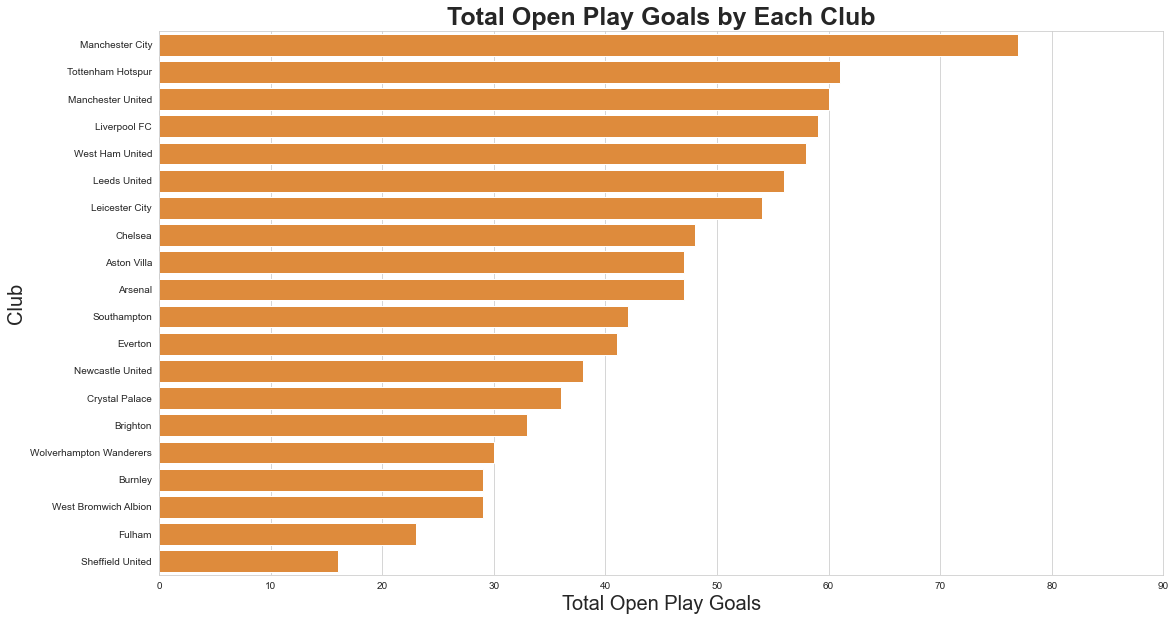

In [16]:
df['OP Goals'] = df['Goals'] - df['Penalty_Goals']
opgoal_club = pd.DataFrame(df.groupby('Club', as_index=False)['OP Goals'].sum())
opgoal_club = opgoal_club.sort_values(by='OP Goals', ascending=False)

fig, g6 = plt.subplots(figsize=(18,10))
ax6 = sns.barplot(y='Club', x='OP Goals', data=opgoal_club, color='#f98a21')
sns.set_style('whitegrid')

plt.title('Total Open Play Goals by Each Club', fontsize=25, fontweight='bold')
plt.ylabel("Club", fontsize = 20, fontweight='normal')
plt.xlabel("Total Open Play Goals", fontsize = 20, fontweight='normal')
plt.xlim(0,90)
plt.show()

 - The previous plot shows the total amount of goals scored by each club (both penalty and non penalty goals), while this plot shows the amount of non penalty / open play goals only. It is seen Manchester City still retain the top spot for this category. The 2nd and 3rd place however its different story, 2nd place Tottenham Hotspurs are ahead of 3rd place Manchester United in which Manchester United are 2nd place for the previous plot. Indicating that they were given more penalties than Tottenham this season.

### Players Total Goals Scored vs Open Play Goals Scored

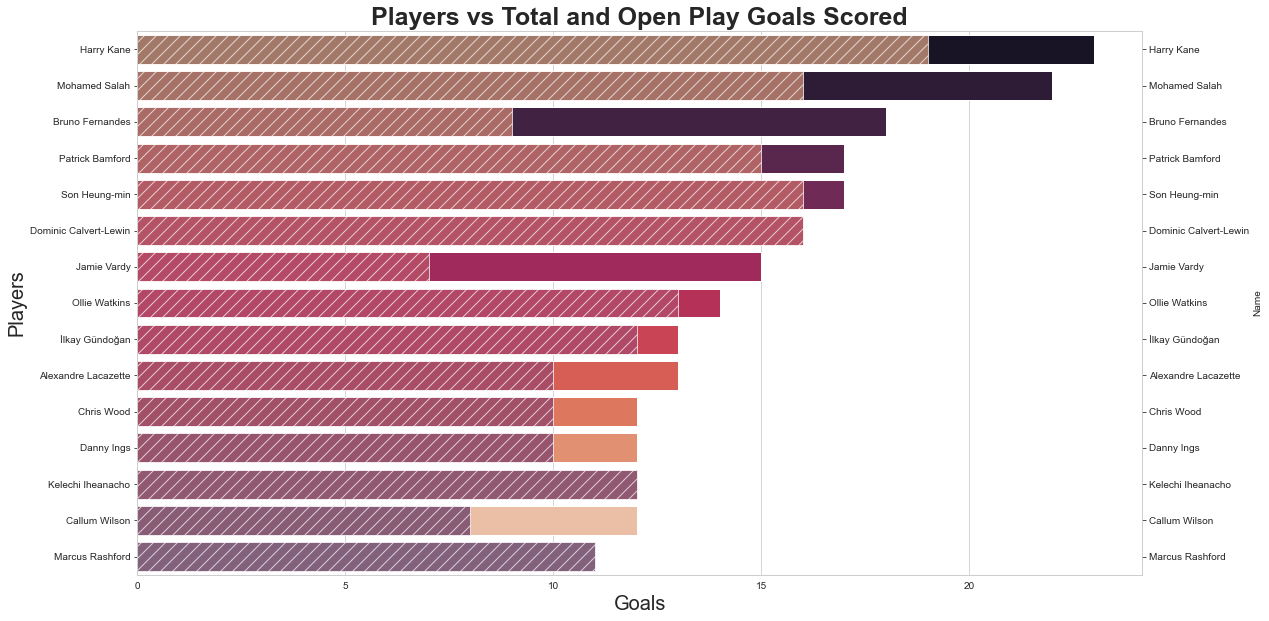

In [17]:
fig, g7 = plt.subplots(figsize=(18,10))
sns.set_style('whitegrid')
ax7 = sns.barplot(x='Goals',y='Name',data=df.sort_values(by='Goals',ascending= False)[:15], palette = 'rocket')
plt.title('Players vs Total and Open Play Goals Scored',fontsize = 25, fontweight='bold')
plt.ylabel("Players", fontsize = 20, fontweight='normal')
plt.xlabel("Goals", fontsize = 20, fontweight='normal')
width = 1
for bar in ax7.containers[0]:
    bar.set_width(bar.get_width() * width)
    
ax8 = ax7.twinx()
ax8 = sns.barplot(x='OP Goals',y='Name',data=df.sort_values(by="Goals",ascending= False)[:15], palette ='flare',alpha = 0.7,hatch = '//')
for bar in ax8.containers[0]:
    y = bar.get_y()
    w = bar.get_width()
    bar.set_y(y - w * (1- width))
    bar.set_width(w * width)

 - Harry Kane of Tottenham Hotspurs is leading the line when it comes to goals. Followed by Mohamed Salah of Liverpool and Bruno Fernandes of Manchester United. Whats interesting though for the top 3, Harry Kane still top having least penalty goals scored out of the 3, meanwhile Bruno Fernandes stacked his goals count by penalty goals, half of his are penalties, Salah one-third of his are penalties.. Just goes to show how effective Harry Kane is infront of goals this season.

### Players Penalties Attempted vs Penalties Scored

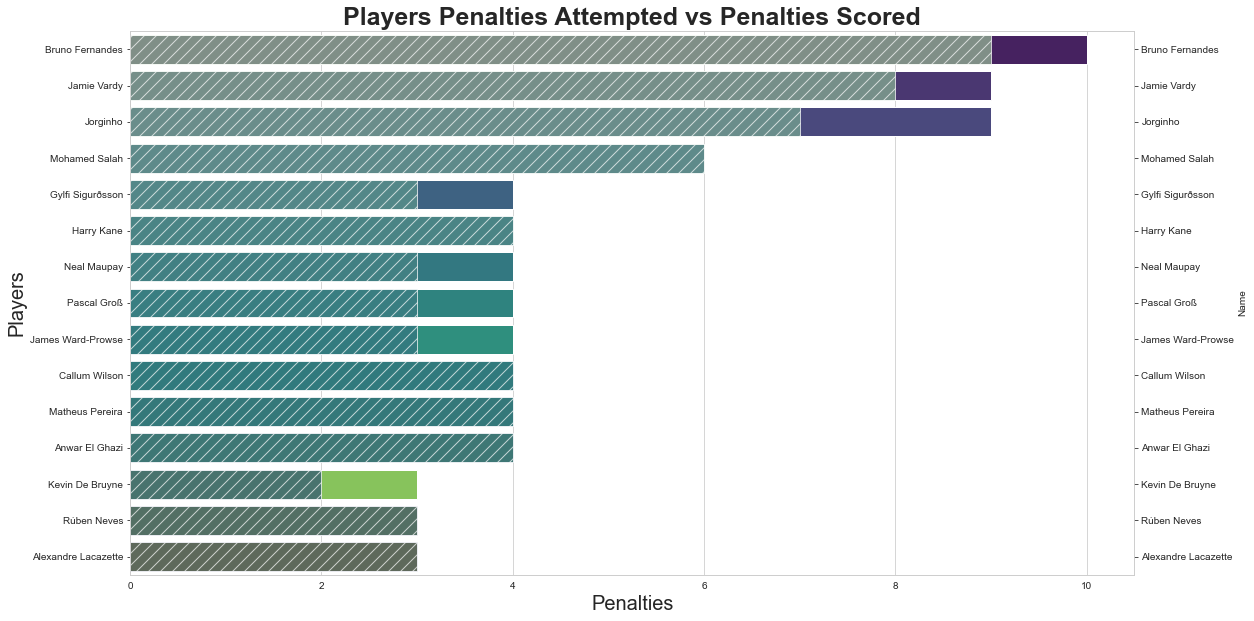

In [18]:
fig, g9 = plt.subplots(figsize=(18,10))
sns.set_style('whitegrid')
ax9 = sns.barplot(x='Penalty_Attempted',y='Name',data=df.sort_values(by='Penalty_Attempted',ascending= False)[:15], palette ='viridis')
plt.title('Players Penalties Attempted vs Penalties Scored',fontsize = 25, fontweight='bold')
plt.ylabel("Players", fontsize = 20, fontweight='normal')
plt.xlabel("Penalties", fontsize = 20, fontweight='normal')
width = 1
for bar in ax9.containers[0]:
    bar.set_width(bar.get_width() * width)
    
ax10 = ax9.twinx()
ax10 = sns.barplot(x='Penalty_Goals',y='Name',data=df.sort_values(by="Penalty_Attempted",ascending= False)[:15], palette = 'crest',alpha = 0.7,hatch = '//')
for bar in ax10.containers[0]:
    y = bar.get_y()
    w = bar.get_width()
    bar.set_y(y - w * (1- width))
    bar.set_width(w * width)

 - The top 3 players with the highest rate of penalty convertion are Bruno Fernandes of Manchester United, Jamie Vardy of Leicester City and Jorginho of Chelsea. Not coincidence, those players belong to the club which receive the most penalties this season than any other clubs. The referee officials sure do love giving penalty to Manchester United, and Bruno is loving it.

### Top 15 Players With The Highet Assist

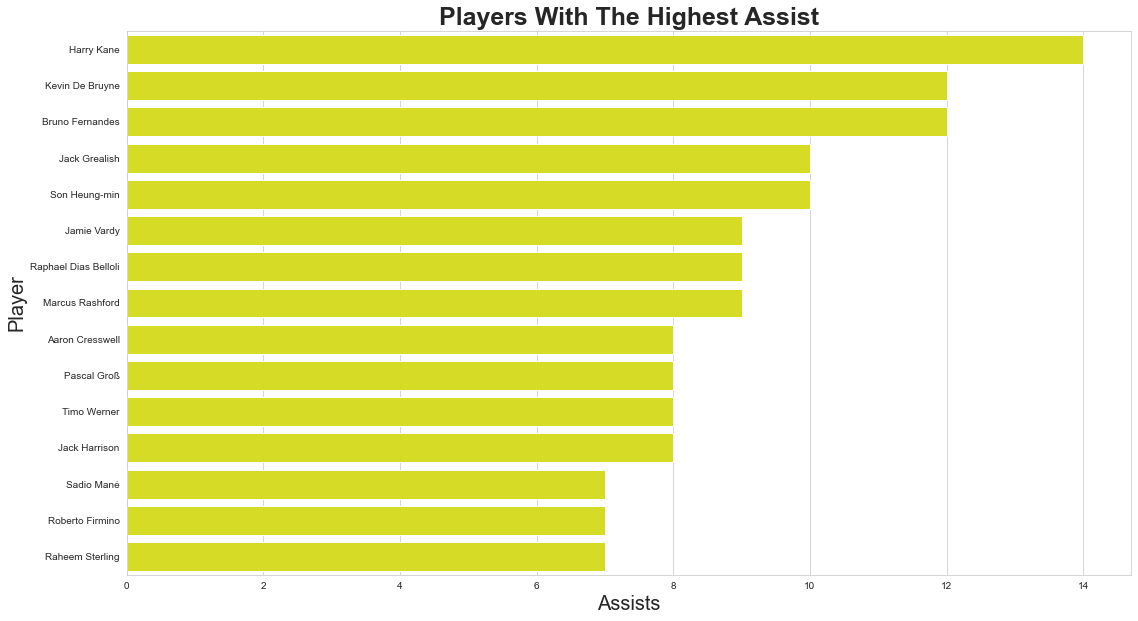

In [19]:
fig, g11 = plt.subplots(figsize=(18,10))
ax11 = sns.barplot(y='Name', x='Assists', data=df.sort_values(by='Assists',ascending= False)[:15], color='#f2f908')
sns.set_style('whitegrid')

plt.title('Players With The Highest Assist', fontsize=25, fontweight='bold')
plt.ylabel('Player', fontsize = 20, fontweight='normal')
plt.xlabel("Assists", fontsize = 20, fontweight='normal')
plt.show()

 - Harry Kane is leading both the top goals scorer and top assister. The man is playing and living his best year currently. Getting both of those are quite an achievement by itself, considering how Tottenham plays very pragmaticly and negatively under their manager and the state of the club are in, how it had been run for the past 2 years, Unfortunately, his performances does not reflect how bad the club performs this season (finishing 8th in the table).
 - Bruno Fernandes and Kevin De Bruyne registered the same amlunt of Assists. The Duo Manchester stars have been compared to one another for the past season, but Bruno has the edge here, because of his goals count, though it is mostly by penlaties.

### Plot of Total Assist Per Position

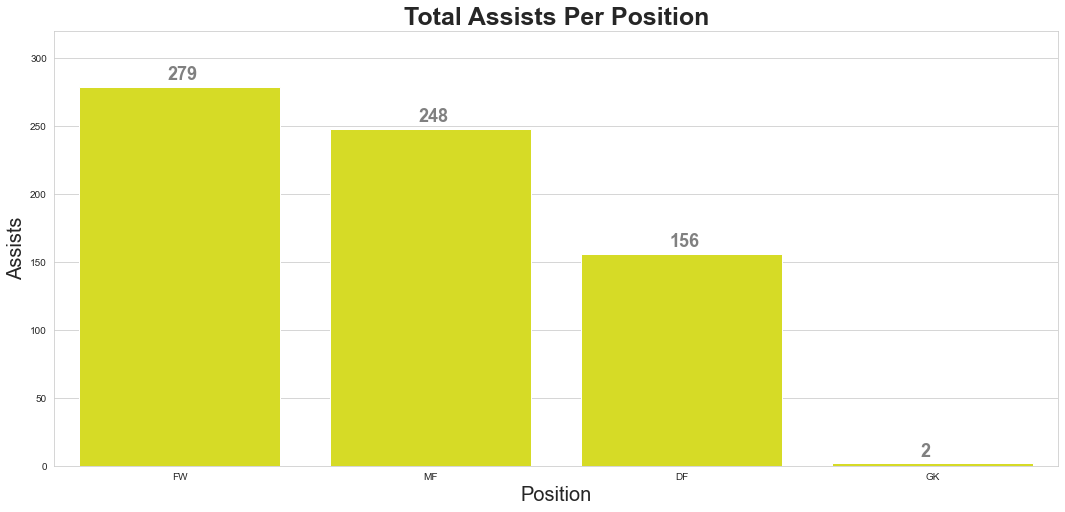

In [20]:
ass_pos = pd.DataFrame(df.groupby('Position',as_index=False)['Assists'].sum())
ass_pos = ass_pos.sort_values(by='Assists',ascending=False)

fig, g12 = plt.subplots(figsize=(18,8))
ax12 = sns.barplot(y='Assists', x='Position', data=ass_pos, color='#f2f908')
sns.set_style('whitegrid')

x12 = np.arange(len(ass_pos['Position']))
y12 = ass_pos['Assists']
for i, v in enumerate(y12):
    g12.text(x12[i]-0.05, v+5, str(v), fontsize = 18, color='gray', fontweight='bold')

plt.title('Total Assists Per Position', fontsize=25, fontweight='bold')
plt.ylabel('Assists', fontsize = 20, fontweight='normal')
plt.xlabel("Position", fontsize = 20, fontweight='normal')
plt.ylim(0,320)
plt.show()

 - The Forwards have the most assists followed by the Midfielder then Defender, as it should be.

### Position WIth The Most Passes Attempted

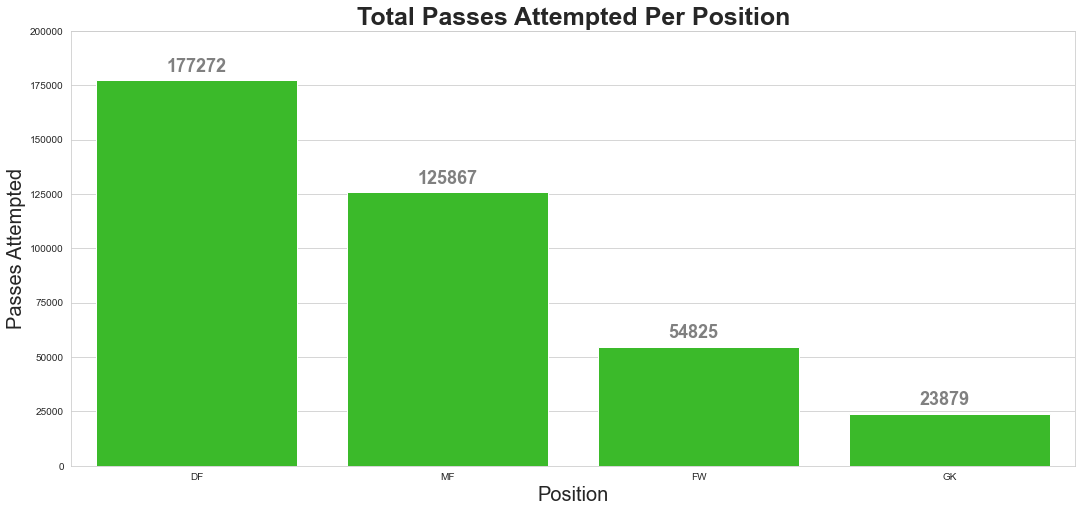

In [21]:
pass_pos = pd.DataFrame(df.groupby('Position',as_index=False)['Passes_Attempted'].sum())
pass_pos = pass_pos.sort_values(by='Passes_Attempted',ascending=False)

fig, g13 = plt.subplots(figsize=(18,8))
ax13 = sns.barplot(y='Passes_Attempted', x='Position', data=pass_pos, color='#29d212')
sns.set_style('whitegrid')

x13 = np.arange(len(ass_pos['Position']))
y13 = pass_pos['Passes_Attempted']
for i, v in enumerate(y13):
    g13.text(x13[i]-0.12, v+4000, str(v), fontsize = 18, color='gray', fontweight='bold')

plt.title('Total Passes Attempted Per Position', fontsize=25, fontweight='bold')
plt.ylabel('Passes Attempted', fontsize = 20, fontweight='normal')
plt.xlabel("Position", fontsize = 20, fontweight='normal')
plt.ylim(0,200000)
plt.show()

 - Shown in the plot above the Defender having the most passes attempted out of any other positions followed by Midfielder and Forward. This is reasonable, especially when a side is in a possesion of the ball, the offense pattern / sequence, comes from defender in deep. In order to progress the ball forward one needs to break their opposition midfield line, but often times that is a quite difficult task, so many players (defenders) prefer to recycle the ball by passing it to another defender before making a guarantee breakthrough pass to the midfield. Hence why defender having the ball the most in a match.

### Total Passes Attempted by Each Club

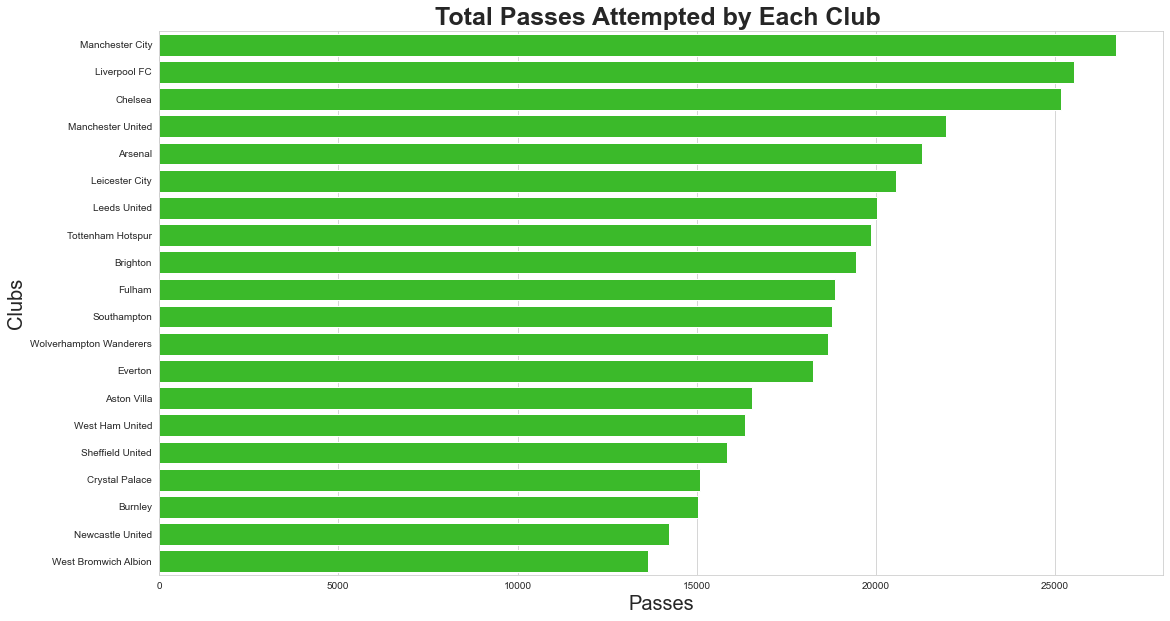

In [22]:
pass_club = pd.DataFrame(df.groupby(by='Club',as_index=False)['Passes_Attempted'].sum())
pass_club = pass_club.sort_values(by='Passes_Attempted',ascending=False)

fig, g14 = plt.subplots(figsize=(18,10))
ax14 = sns.barplot(y='Club', x='Passes_Attempted', data=pass_club, color='#29d212')
sns.set_style('whitegrid')

plt.title('Total Passes Attempted by Each Club ', fontsize=25, fontweight='bold')
plt.ylabel('Clubs', fontsize = 20, fontweight='normal')
plt.xlabel("Passes", fontsize = 20, fontweight='normal')
plt.show()

 - Manchester City, Liverpool and Chelsea the top 3 teams having the most passes attempted out of any other clubs. Considering how the managers for each of these 3 club set up their team to play possesion based football. The team which can preserve possesion of the ball are the ones controlling the match and very likely to score goals. Manchester City on the top when it come to goals, it is hardly a surprise.

### Players With The Most Passes Attempted

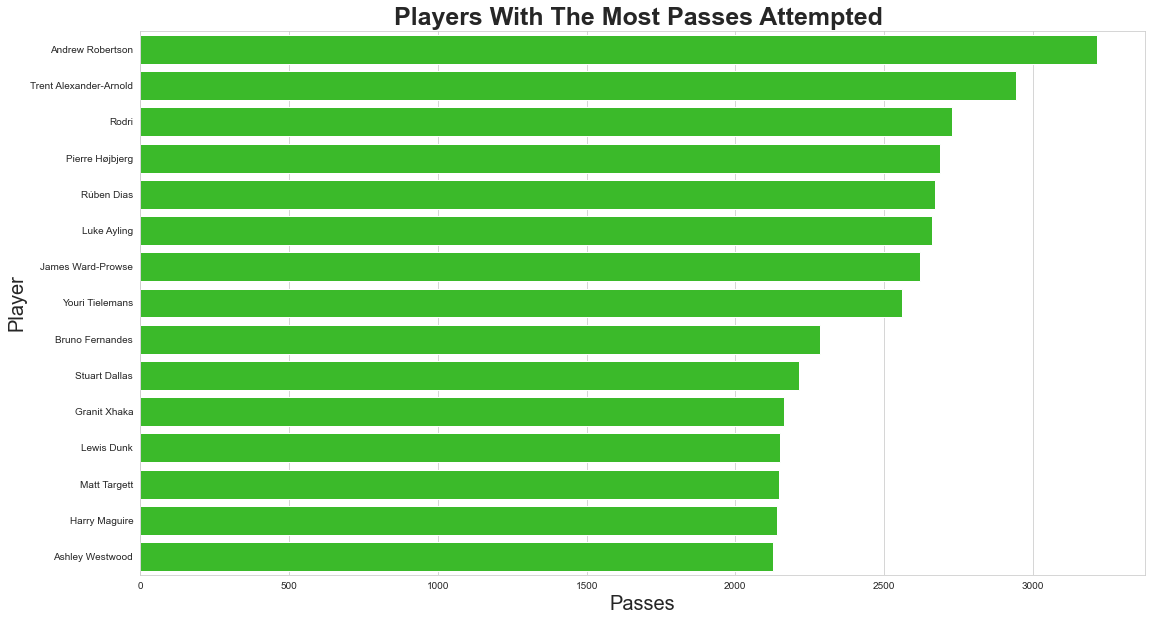

In [23]:
fig, g15 = plt.subplots(figsize=(18,10))
ax15 = sns.barplot(y='Name', x='Passes_Attempted', data=df.sort_values(by='Passes_Attempted',ascending=False)[:15], color='#29d212')
sns.set_style('whitegrid')

plt.title('Players With The Most Passes Attempted ', fontsize=25, fontweight='bold')
plt.ylabel('Player', fontsize = 20, fontweight='normal')
plt.xlabel("Passes", fontsize = 20, fontweight='normal')
plt.show()

 - As said above, defender are the ones who have the most passes attempted. Of the top 15 players with the most passes attempted above, 10 of them are Defenders while the rest of 5 are Midfielders which positioned precisely in front of the defender (Defensive Midfielder).

### Players With The Highest Average Minutes Per Fixture

In [24]:
df[['Name','Club','Position','Mins/Match']].sort_values(by='Mins/Match',ascending=False)[:60]

,Name,Club,Position,Mins/Match
266,John McGinn,Aston Villa,MF,90.000000
447,Alphonse Areola,Fulham,GK,90.000000
357,Scott Dann,Crystal Palace,DF,90.000000
199,Pablo Marí,Arsenal,DF,90.000000
366,James Ward-Prowse,Southampton,MF,90.000000
369,Alex McCarthy,Southampton,GK,90.000000
84,Alisson,Liverpool FC,GK,90.000000
383,Fraser Forster,Southampton,GK,90.000000
388,Kayne Ramsey,Southampton,DF,90.000000
402,Robert Sánchez,Brighton,GK,90.000000


 - Top 60 players in the league who has the highest average game time (minutes) per fixture given to respective players.

### Most Aggresive Club

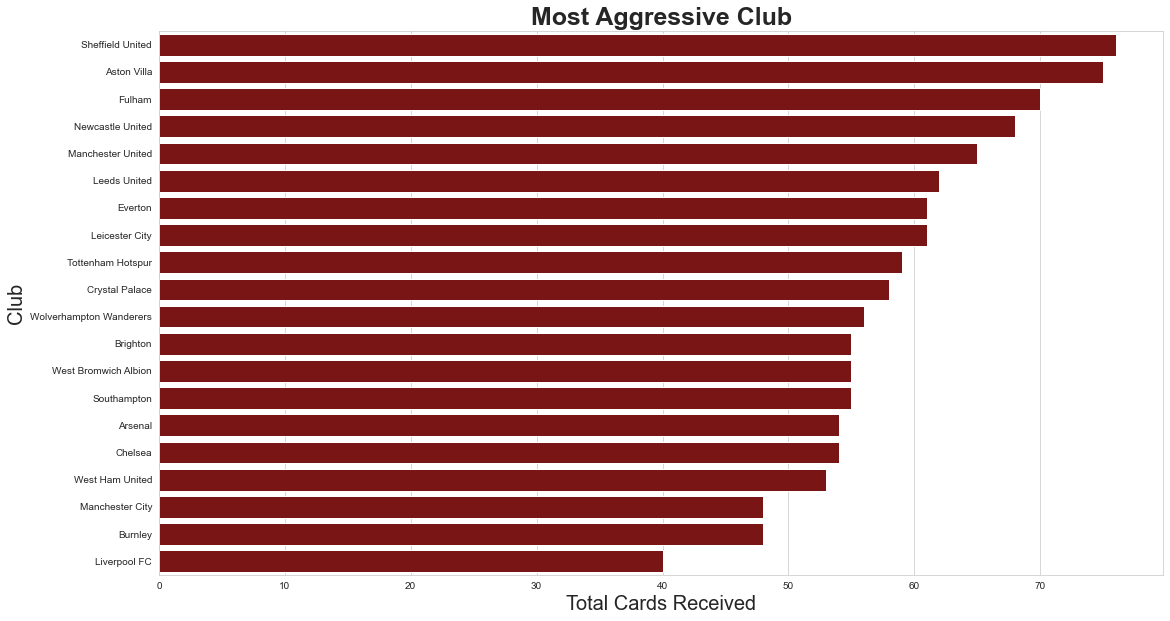

In [25]:
df['TotalCards'] = df['Yellow_Cards'] + df['Red_Cards']
agg_club = pd.DataFrame(df.groupby('Club',as_index=False)['TotalCards'].sum())
agg_club = agg_club.sort_values(by='TotalCards',ascending=False)

fig, g16 = plt.subplots(figsize=(18,10))
ax16 = sns.barplot(y='Club', x='TotalCards', data=agg_club, color='#8b0404')
sns.set_style('whitegrid')

plt.title('Most Aggressive Club', fontsize=25, fontweight='bold')
plt.ylabel('Club', fontsize = 20, fontweight='normal')
plt.xlabel("Total Cards Received", fontsize = 20, fontweight='normal')
plt.show()

 - Clubs which have the most cards total combined. Sheffield United, Aston Villa and Fullham are the teams we want to watch out when playing against, as they are likely to commit many fouls, indicated by how many they received both yellow and red cards combined.

### Most Aggressive Player

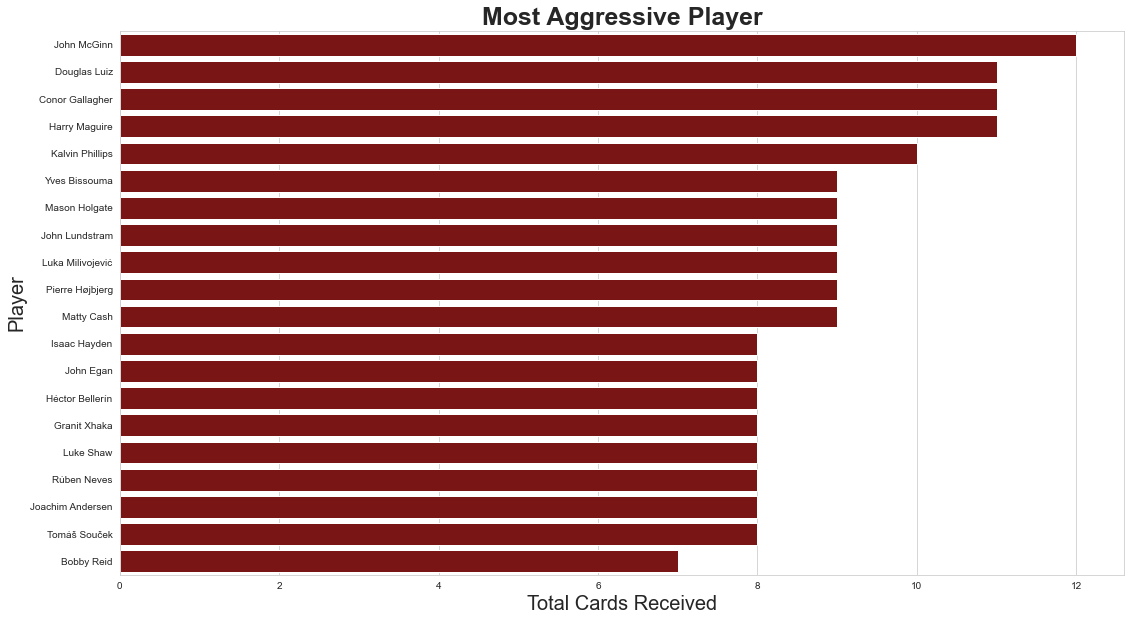

In [26]:
fig, g17 = plt.subplots(figsize=(18,10))
ax17 = sns.barplot(y='Name', x='TotalCards', data=df.sort_values(by='TotalCards',ascending=False)[:20], color='#8b0404')
sns.set_style('whitegrid')

plt.title('Most Aggressive Player', fontsize=25, fontweight='bold')
plt.ylabel('Player', fontsize = 20, fontweight='normal')
plt.xlabel("Total Cards Received", fontsize = 20, fontweight='normal')
plt.show()

 - Top 20 Players with the most total cards combined. John Mcgin of Aston Villa surely has to be in the radar of any clubs when clubs playing against him.

## Further Data Exploration : England's Future Stars

 - We now focusing how the England's young talents perform in the 20/21 Premier League. Goals scored, to assists and game time.

### England's Top 20 U-23 Players WIth The Highest Average Minutes Per Fixture

In [27]:
filt3 = (df['Age'] < 23) & (df['Nationality'] == 'ENG')
df.loc[filt3,["Name",'Age','Club','Position','Mins/Match']].sort_values(by='Mins/Match',ascending=False)[:25]

,Name,Age,Club,Position,Mins/Match
116,James Justin,22,Leicester City,DF,90.000000
52,Aaron Wan-Bissaka,22,Manchester United,DF,90.000000
505,Aaron Ramsdale,22,Sheffield United,GK,90.000000
354,Tyrick Mitchell,20,Crystal Palace,DF,90.000000
388,Kayne Ramsey,19,Southampton,DF,90.000000
139,Declan Rice,21,West Ham United,MF,89.968750
448,Tosin Adarabioyo,22,Fulham,DF,89.484848
269,Ezri Konsa,22,Aston Villa,DF,88.777778
395,Ben White,22,Brighton,DF,88.638889
240,Ben Godfrey,22,Everton,DF,86.612903


 - It seems that several managers are indeed giving their trust to these young players to feature for the each respective club, judging by the minutes and game time the managers give them. Majority of these young players are given  near or a full minute match (90 minutes), indicating that they may have the potential to become a gerat players in the future.

### England Top 20 U-23 Players With The Most Goals

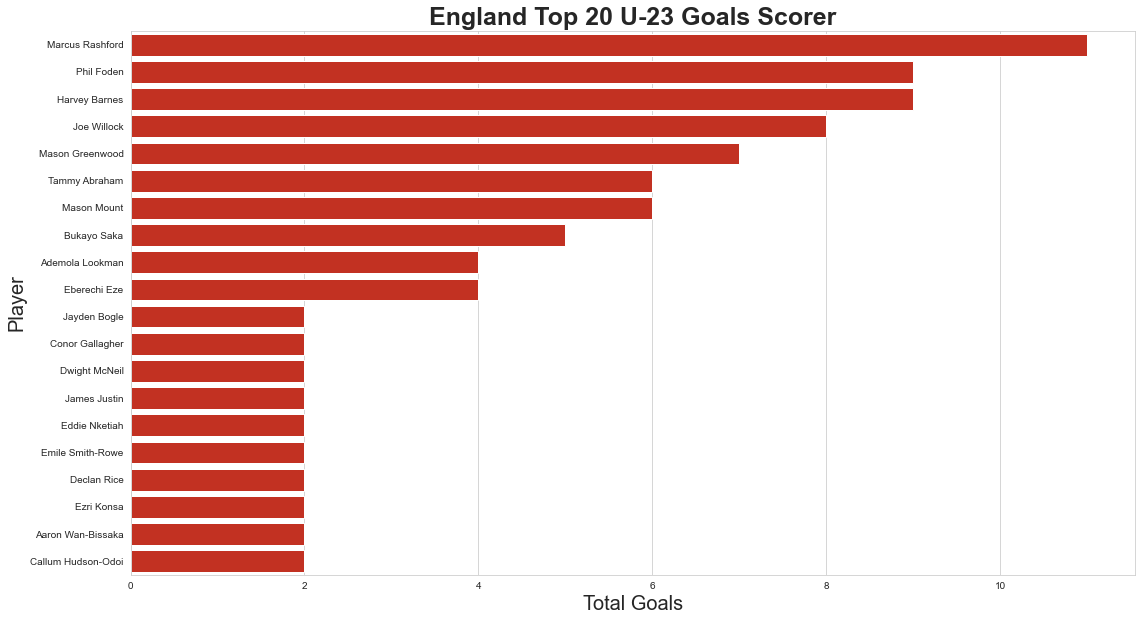

In [28]:
df_u23 = df.loc[filt3]
df_u23

fig, g18 = plt.subplots(figsize=(18,10))
ax18 = sns.barplot(y='Name', x='Goals', data=df_u23.sort_values(by='Goals',ascending=False)[:20], color='#dd1b07')
sns.set_style('whitegrid')

plt.title('England Top 20 U-23 Goals Scorer', fontsize=25, fontweight='bold')
plt.ylabel('Player', fontsize = 20, fontweight='normal')
plt.xlabel("Total Goals", fontsize = 20, fontweight='normal')
plt.show()

 - Marcus Rashford of Manchester United is leading top scorer for England's U-23, followed by Phil Foden of Manchester City then Mason Mount of Chelsea.

### England Top 20 U-23 Players WIth The Most Assists

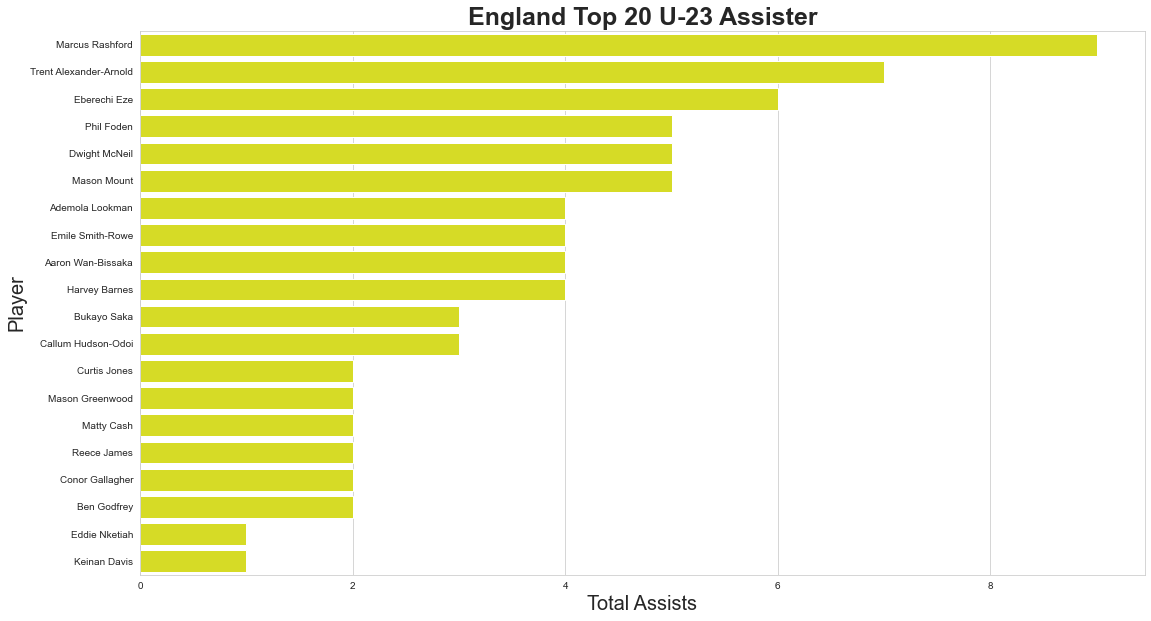

In [29]:
fig, g19 = plt.subplots(figsize=(18,10))
ax19 = sns.barplot(y='Name', x='Assists', data=df_u23.sort_values(by='Assists',ascending=False)[:20], color='#f2f908')
sns.set_style('whitegrid')

plt.title('England Top 20 U-23 Assister', fontsize=25, fontweight='bold')
plt.ylabel('Player', fontsize = 20, fontweight='normal')
plt.xlabel("Total Assists", fontsize = 20, fontweight='normal')
plt.show()

 - Marcus Rashford once again leading for the highest assister for England's U-23, followed by Trent Alexander Arnold of Liverpool. Whats inteersting is though, Trent is not a Forward, he is a Defender which is not common to play a pass leading to goals, unlike Forward or Midfield which is what they good at. Well, this is because of how Liverpool set the team up to play, see, even though Trent is deployed as Defender, he is often instructed to play high up the pitch supporting the midfield and forward by strecthing or overloading the opposition line. As a result to this he has the spaces to give crosses to his teammates inside the penalty box, which majority of it lead to a goal.

### England Top 20 U-23 Players WIth The Most Passes Attempted

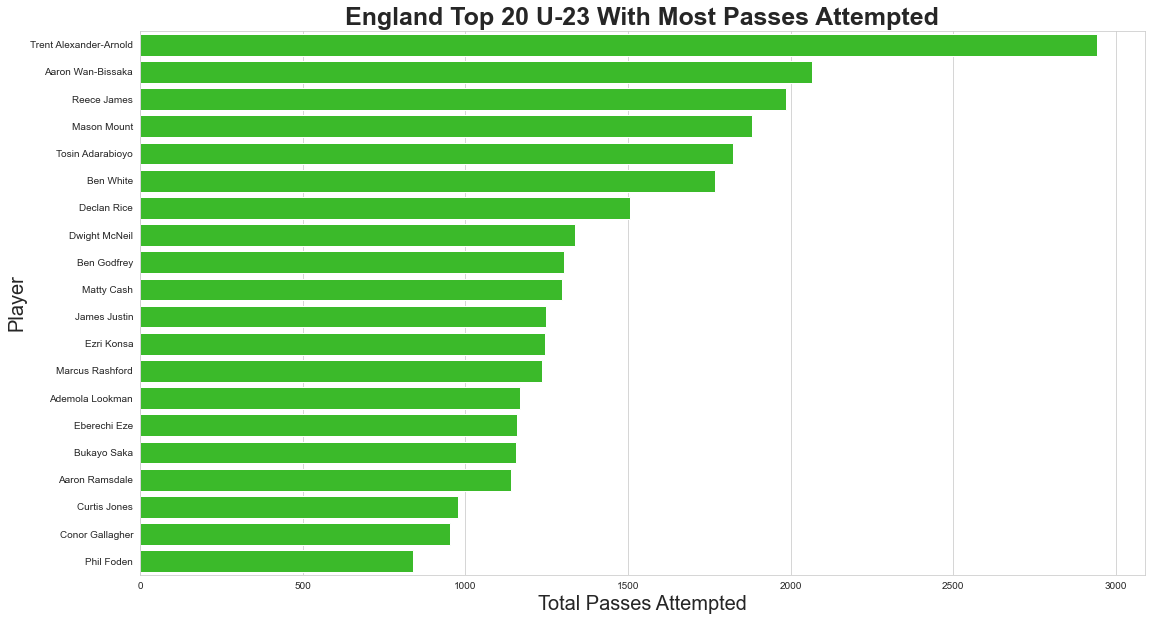

In [30]:
fig, g20 = plt.subplots(figsize=(18,10))
ax20 = sns.barplot(y='Name', x='Passes_Attempted', data=df_u23.sort_values(by='Passes_Attempted',ascending=False)[:20], color='#29d212')
sns.set_style('whitegrid')

plt.title('England Top 20 U-23 With Most Passes Attempted', fontsize=25, fontweight='bold')
plt.ylabel('Player', fontsize = 20, fontweight='normal')
plt.xlabel("Total Passes Attempted", fontsize = 20, fontweight='normal')
plt.show()

 - Trent Alexander Arnold has the most passes attempted and touches of the ball amongst England's U-23, as explained before, it is no surprise why he is up there at the top. Followed by Aaron Wan Bissaka of Manchester United and Reece James of Chelsea. Coincidencely, all of the 3 players are at the same position, all of them are deployed as a right flank defender (right fullback). But notice the large number of assists and passes attempted gap between Trent and the rest 2. This goes to show that team set up and how the team plays are very crucial part of football, in which liverpool executes this properly.

## Conclusion

Key takeaway from Exploratory Data Analysis are as follows:
 - The number of players for each positon is not very balanced, Midfield and Forward ideally should have greater number than Defender.
 - The Age for this English Premier League campaign is very well distributed, majority players are at te age of 26 to 30.
 - Manchester United have the youngest squad.
 - The League has many england players than any other nations, is is reasonable considering it is their local league.
 - Forwards scoring goals as expected.
 - Manchester City have both the most Total Goals and Open Goals.
 - Harry Kane is both Top Goals scorer and Assister.
 - Bruno Fernandes has the highest Penalty converter.
 - Defenders have the most passes attempted and touches of the ball.
 - Aston Villa is the most agresive club, having the most total cards for yellow and red combined.
 - England has very promising young talents.